# 실습 1. Determinant

In [1]:
def determinant(matrix):
    n = len(matrix)
    det = 0
    
    if n == 2: return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    for i in range(n):
        sign = (-1) ** i
        
        submatrix = [row[:i] + row[i + 1:] for row in matrix[1:]] # 부분 행렬 생성
        det += sign * matrix[0][i] * determinant(submatrix) # 2이상의 행렬의 경우 재귀적으로 계산
    
    return det

In [2]:
# 교재에 있는 matrix
matrix_1 = [
    [8, 1, 6],
    [3, 5, 7],
    [4, 9, 2]
] 

# test할 matrix
matrix_2 = [
    [8, 1, 6, 1],
    [3, 5, 7, 2],
    [4, 9, 2, 5],
    [3, 5, 7, 1]
]

In [3]:
det = determinant(matrix_2)
print("Determinant of the matrix:", det)

Determinant of the matrix: 360


### 검증을 하기 위해 numpy를 사용해서 Determinant

In [4]:
import numpy as np
np.linalg.det(np.array(matrix_2))

359.9999999999997

# 실습 2. transformation

In [40]:
#!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.2/38.1 MB 1.6 MB/s eta 0:00:24
   ---------------------------------------- 0.3/38.1 MB 1.9 MB/s eta 0:00:20
    --------------------------------------- 0.5/38.1 MB 2.4 MB/s eta 0:00:16
    --------------------------------------- 0.6/38.1 MB 2.4 MB/s eta 0:00:16
    --------------------------------------- 0.7/38.1 MB 2.4 MB/s eta 0:00:16
    --------------------------------------- 0.9/38.1 MB 2.5 MB/s eta 0:00:16
   - -------------------------------------- 1.0/38.1 MB 2.4 MB/s eta 0:00:16
   - ------------------

In [5]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

shape of gray_cat:  (640, 427)
[[19 19 20 ... 19 19 19]
 [19 19 20 ... 19 19 19]
 [19 19 20 ... 19 19 19]
 ...
 [26 26 26 ... 26 25 25]
 [26 26 26 ... 26 26 25]
 [25 25 24 ... 27 27 26]]


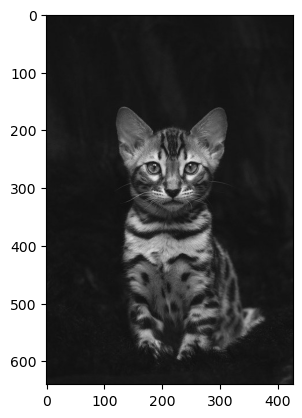

In [6]:
gray_cat = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
print('shape of gray_cat: ', gray_cat.shape)
print(gray_cat)
plt.imshow(gray_cat, cmap='gray')
plt.show()

In [217]:
def rotate_image(image, angle):
    # 이미지 중심 좌표
    height, width = image.shape
    center_x, center_y = width // 2, height // 2

    # PPT에서 왼쪽 방향으로 회전하고 있으므로
    theta = -angle
    
    # 빈 이미지 생성
    rotated_image = np.zeros((height, width), dtype=image.dtype)
    print("image size: ", rotated_image.shape)
    
    # 이미지 회전
    for y in range(height):
        for x in range(width):
            # 현재 픽셀 좌표를 회전 변환 적용
            new_x = int((x-center_x) * np.cos(theta) - (y-center_y) * np.sin(theta))+center_x
            new_y = int((x-center_x) * np.sin(theta) + (y-center_y) * np.cos(theta))+center_y
            
            # 범위 확인 후 픽셀 복사
            if (0 <= new_x < width) and (0 <= new_y < height):
                rotated_image[new_y, new_x] = image[y, x]

    return rotated_image

image size:  (640, 427)


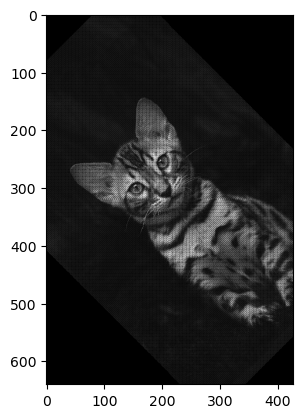

In [218]:
angle = 45

rotated_img = rotate_image(gray_cat, np.radians(angle))
plt.imshow(rotated_img, cmap='gray')
plt.show()

# 심화 문제. composite_transformation

In [148]:
def composite_transformation(image, theta, translation):
    # 회전 적용
    rotated_image = rotate_image(image, theta)
    
    # 빈 이미지 생성
    height, width = rotated_image.shape
    transformed_image = np.zeros((height, width), dtype=image.dtype)

    # 이미지 이동
    for y in range(height):
        for x in range(width):
            # 현재 픽셀 좌표를 회전 변환 적용
            new_x = x + translation[0]
            new_y = y - translation[1]
            # 범위 확인 후 픽셀 복사
            if (0 <= new_x < width) and (0 <= new_y < height):
                transformed_image[new_y, new_x] = rotated_image[y, x]

    return transformed_image

In [149]:
gray_cat = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

(640, 427)


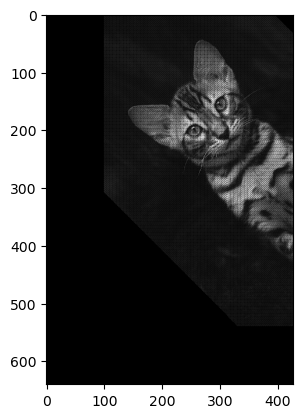

In [150]:
angle = 45
t1, t2 = 100, 100 # 우상단으로 이동

new_image = composite_transformation(gray_cat, np.radians(angle), (t1, t2))
plt.imshow(new_image, cmap='gray')
plt.show()

이미지 잘림 현상 발생하여 이미지가 잘리지 않도록 해줌.
- 다양한 방법이 있겠지만, 보드의 상하좌우에 임의로 300을 더해준 뒤 회전, 이동을 실행하고, 다시 원래의 크기로 되돌리는 방법 사용,

In [229]:
def composite_transformation(image, theta, translation):    
    # 빈 이미지 생성
    margin = 300
    height, width = image.shape
    transformation_image = np.zeros((height+margin*2, width+margin*2), dtype=image.dtype)
    new_height, new_width = transformation_image.shape
    center_x, center_y = new_width // 2, new_height // 2
    print("margin image shape: ", transformation_image.shape)
    
    margin_cat = np.zeros((height+margin*2, width+margin*2), dtype=image.dtype)
    for y in range(height):
        for x in range(width):
            margin_cat[300+y, 300+x] = image[y, x]
            
    # 마진 고양이 중간 결과 표시(과정을 확인하기 위해)
    plt.imshow(margin_cat, cmap='gray')
    plt.title('margin cat')
    plt.show()
    
    rotated_img = rotate_image(margin_cat, np.radians(angle))
    
    # 회전 결과 표시(과정을 확인하기 위해)
    plt.imshow(rotated_img, cmap='gray')
    plt.title('rotated img')
    plt.show()
    
    # 이미지 이동
    for y in range(new_height):
        for x in range(new_width):
            # 픽셀 이동
            new_x = x + translation[0]
            new_y = y - translation[1]

            if (0 <= new_x < new_width) and (0 <= new_y < new_height):
                transformation_image[new_y, new_x] = rotated_img[y, x]

    # 이동 중간 결과 표시(과정을 확인하기 위해)
    plt.imshow(transformation_image, cmap='gray')
    plt.title('transformation img')
    plt.show()
    
    transformation_image = transformation_image[margin:-margin, margin:-margin]
    return transformation_image

In [230]:
gray_cat = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

margin image shape:  (1240, 1027)


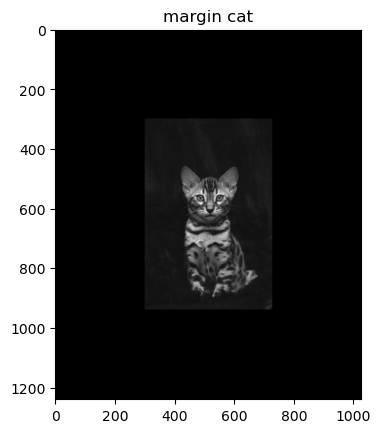

image size:  (1240, 1027)


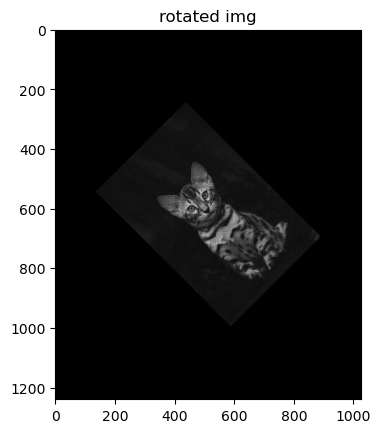

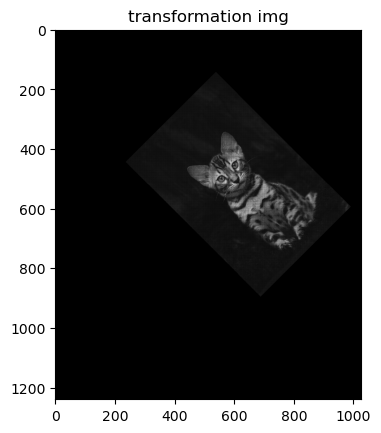

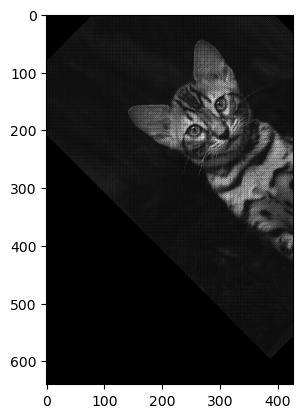

In [231]:
angle = 45
t1, t2 = 100, 100 # 우상단으로 이동

new_image = composite_transformation(gray_cat, np.radians(angle), (t1, t2))
plt.imshow(new_image, cmap='gray')
plt.show()

## 최종 코드

In [232]:
def composite_transformation(image, theta, translation):
    # 빈 이미지 생성
    margin = 300
    height, width = image.shape
    transformation_image = np.zeros((height+margin*2, width+margin*2), dtype=image.dtype)
    new_height, new_width = transformation_image.shape
    center_x, center_y = new_width // 2, new_height // 2
    print("margin image shape: ", transformation_image.shape)
    
    margin_cat = np.zeros((height+margin*2, width+margin*2), dtype=image.dtype)
    for y in range(height):
        for x in range(width):
            margin_cat[300+y, 300+x] = image[y, x]
    
    rotated_img = rotate_image(margin_cat, np.radians(angle))

    # 이미지 이동
    for y in range(new_height):
        for x in range(new_width):
            # 픽셀 이동
            new_x = x + translation[0]
            new_y = y - translation[1]

            if (0 <= new_x < new_width) and (0 <= new_y < new_height):
                transformation_image[new_y, new_x] = rotated_img[y, x]

    transformation_image = transformation_image[margin:-margin, margin:-margin]
    return transformation_image

In [233]:
gray_cat = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

margin image shape:  (1240, 1027)
image size:  (1240, 1027)


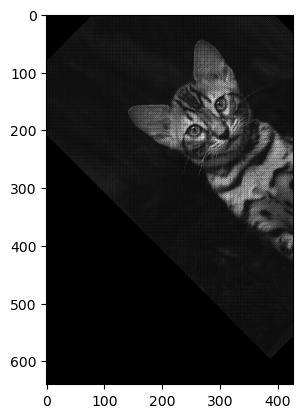

In [234]:
angle = 45
t1, t2 = 100, 100 # 우상단으로 이동

new_image = composite_transformation(gray_cat, np.radians(angle), (t1, t2))
plt.imshow(new_image, cmap='gray')
plt.show()